SECTION FOR UNFILTERED OBSERVATIONS

Mean of Unfiltered Observations:  50.3324924158986

Median of Unfiltered Observations:  49.99696148252969

Variance of Unfiltered Observations:  115.88565801835402


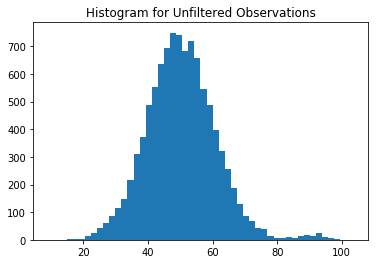

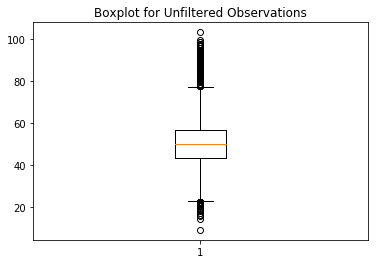

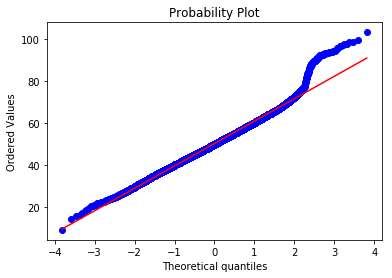

SECTION FOR 0.998 FILTERED OBSERVATIONS

Left Confidence Interval:  17.06607948830414

Right Confidence Interval:  83.59890534349306

Filtered Observations:
 [42.22670059 60.50752623 57.62726847 ... 40.67781771 58.29258401
 36.67346682]

Mean of Filtered Observations:  49.94707647735679

Median of Filtered Observations:  49.89171436617705

Variance of Filtered Observations:  99.70574103374587


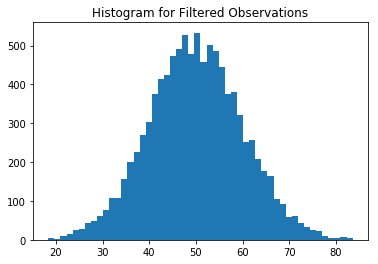

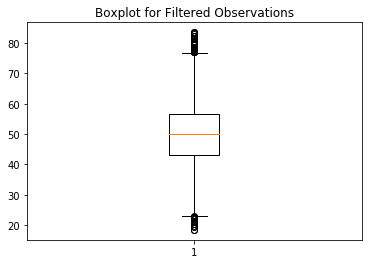

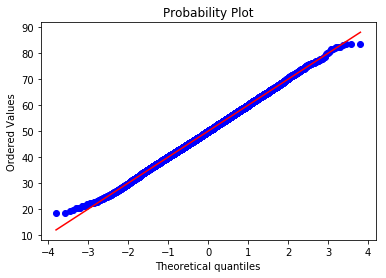

Number of removed observations:  103

SECTION FOR 0.99 FILTERED OBSERVATIONS

Left Confidence Interval:  22.603638157327367

Right Confidence Interval:  78.06134667446983

Filtered Observations:
 [42.22670059 60.50752623 57.62726847 ... 40.67781771 58.29258401
 36.67346682]

Mean of Filtered Observations:  49.9565587532248

Median of Filtered Observations:  49.89715460663819

Variance of Filtered Observations:  96.24408443619781


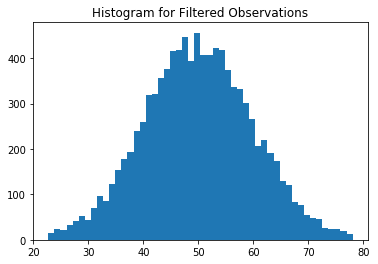

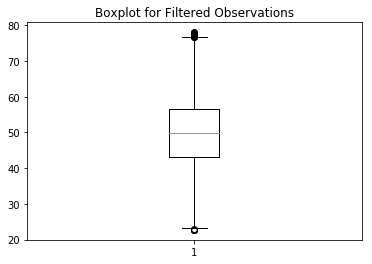

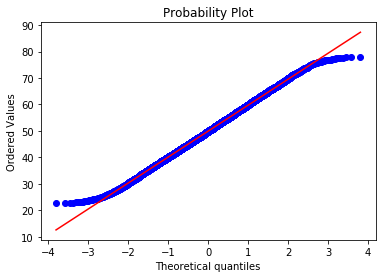

Number of removed observations:  146

SECTION FOR IQR FILTERED OBSERVATIONS

Mean of Filtered Observations Using IQR:  49.942437204981594

Median of Filtered Observations Using IQR:  49.89171436617705

Variance of Filtered Observations Using IQR:  95.89991153865734


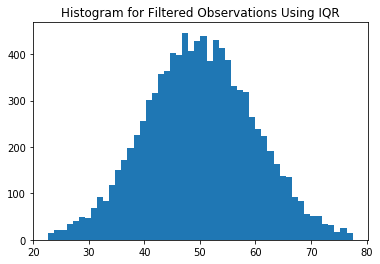

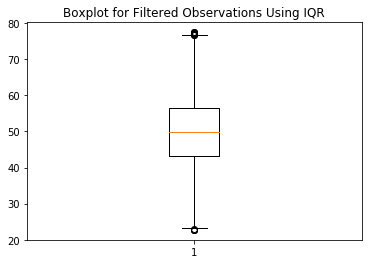

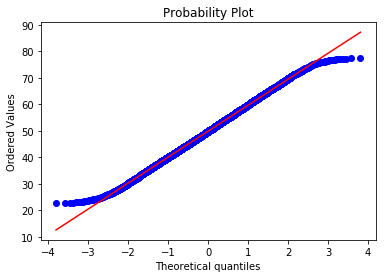

Number of removed observations using IQR:  151


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab 
from scipy.stats import iqr
import scipy.stats as stats

data = np.load('O_data.npy')

print("=====================================================================\n"
      "SECTION FOR UNFILTERED OBSERVATIONS\n")

# problem 1
# mean, median, and variance for unfiltered observations
mean = np.mean(data)
median = np.median(data)
variance = np.var(data)

print("Mean of Unfiltered Observations: ", mean) 
print("\nMedian of Unfiltered Observations: ", median) 
print("\nVariance of Unfiltered Observations: ", variance)

# problem 2 
# histogram for unfiltered observations
plt.hist(data, bins = 50) 
plt.title("Histogram for Unfiltered Observations") 
plt.show()

# Problem 3 
# boxplot for unfiltered observations
plt.boxplot(data)
plt.title("Boxplot for Unfiltered Observations") 
plt.show()

# Problem 4
# ANSWERS:
# I do think some of the observations are spurious.
# These is a difference between the mean and median and noticeable outliers. 
# I think the outliers are on the upper end of the observed data. 

# Problem 5
# probability plot for unfiltered data
# ANSWERS:
# Yes, the plot confirms my outlier diagnosis; 
# values are not in a straight line on the upper end.

stats.probplot(data, dist = "norm", plot = pylab)
pylab.show()

print("=====================================================================\n"
      "SECTION FOR 0.998 FILTERED OBSERVATIONS\n")

# Problem 6
# handling extreme values
standard_deviation = np.std(data)

# calculating left confidence interval limit
left_confidence_interval = stats.norm.ppf((1 - .998) / 2, mean, scale = standard_deviation)

# calculating right confidence interval limit
right_confidence_interval = stats.norm.ppf((1 + .998) / 2, loc = mean, scale = standard_deviation)

# removing extreme values
filtered_data = data[np.where(data > left_confidence_interval)]
filtered_data = filtered_data[np.where(filtered_data < right_confidence_interval)]

print("Left Confidence Interval: ", left_confidence_interval)
print("\nRight Confidence Interval: ", right_confidence_interval)
print("\nFiltered Observations:\n", filtered_data)

# problem 7
# mean, median, and variance for filtered data
filtered_mean = np.mean(filtered_data)
filtered_median = np.median(filtered_data)
filtered_variance = np.var(filtered_data)

print("\nMean of Filtered Observations: ", filtered_mean) 
print("\nMedian of Filtered Observations: ", filtered_median) 
print("\nVariance of Filtered Observations: ", filtered_variance)

# histogram for filtered data
plt.hist(filtered_data, bins = 50) 
plt.title("Histogram for Filtered Observations") 
plt.show()

# boxplot for filtered data
plt.boxplot(filtered_data)
plt.title("Boxplot for Filtered Observations") 
plt.show()

# probability plot for filtered data  
stats.probplot(filtered_data, dist = "norm", plot = pylab)
pylab.show()

# Problem 8
# ANSWERS:
# Yes, and mean and median are nearly identical.
# Yes, comparing the histograms and box plots indicates removed outliers. 
# Yes, the probability plot indicates removed outliers. 

# calculate number of removed observations - returns 103
print ("Number of removed observations: ", len(data) - len(filtered_data))

print("\n=====================================================================\n"
      "SECTION FOR 0.99 FILTERED OBSERVATIONS\n")

# Problem 9
# filtering using .99 confidence interval
# ANSWERS:
# The variance number decreased.
# The mean and median are closer with increased filtering. 
# Yes, comparing the histograms and box plots indicates removed outliers. 
# The probability plot is not as linear as with the previous filtering. 

# calculating left confidence interval limit
left_confidence_interval = stats.norm.ppf((1 - .99) / 2, mean, scale = standard_deviation)

# calculating right confidence interval limit
right_confidence_interval = stats.norm.ppf((1 + .99) / 2, loc = mean, scale = standard_deviation)

# removing extreme values
filtered_data = data[np.where(data > left_confidence_interval)]
filtered_data = filtered_data[np.where(filtered_data < right_confidence_interval)]

print("Left Confidence Interval: ", left_confidence_interval)
print("\nRight Confidence Interval: ", right_confidence_interval)
print("\nFiltered Observations:\n", filtered_data)

filtered_mean = np.mean(filtered_data)
filtered_median = np.median(filtered_data)
filtered_variance = np.var(filtered_data)

print("\nMean of Filtered Observations: ", filtered_mean) 
print("\nMedian of Filtered Observations: ", filtered_median) 
print("\nVariance of Filtered Observations: ", filtered_variance)

# histogram for filtered data
plt.hist(filtered_data, bins = 50) 
plt.title("Histogram for Filtered Observations") 
plt.show()

# boxplot for filtered data
plt.boxplot(filtered_data)
plt.title("Boxplot for Filtered Observations") 
plt.show()

# probability plot for filtered data  
stats.probplot(filtered_data, dist = "norm", plot = pylab)
pylab.show()

# calculate number of removed observations - returns 146
print ("Number of removed observations: ", len(data) - len(filtered_data))

print("\n=====================================================================\n"
      "SECTION FOR IQR FILTERED OBSERVATIONS\n")

# Problem 10
# filtering using IQR
# ANSWERS:
# The variance number decreased.
# The mean and median are even closer with increased filtering. 
# Yes, comparing the histograms and box plots indicates removed outliers. 
# Again, the probability plot is not as linear as with the .998 filtering. 
IQR = iqr(data)
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
lower_limit = (Q1 - (1.5 * IQR))
upper_limit = (Q3 + (1.5 * IQR))

filtered_data = data[np.where(data > lower_limit)]
filtered_data = filtered_data[np.where(filtered_data < upper_limit)]

filtered_mean = np.mean(filtered_data)
filtered_median = np.median(filtered_data)
filtered_variance = np.var(filtered_data)

print("Mean of Filtered Observations Using IQR: ", filtered_mean) 
print("\nMedian of Filtered Observations Using IQR: ", filtered_median) 
print("\nVariance of Filtered Observations Using IQR: ", filtered_variance)

# histogram for filtered data using IQR
plt.hist(filtered_data, bins = 50) 
plt.title("Histogram for Filtered Observations Using IQR") 
plt.show()

# boxplot for filtered data using IQR
plt.boxplot(filtered_data)
plt.title("Boxplot for Filtered Observations Using IQR") 
plt.show()

# probability plot for filtered data using IQR 
stats.probplot(filtered_data, dist = "norm", plot = pylab)
pylab.show()

# calculate number of removed observations
print ("Number of removed observations using IQR: ", len(data) - len(filtered_data))

# Problem 11
# Comparing the histograms for all three filters, I think IQR filtering
# does the best job removing outliers. This is reflected by the closest
# mean and median values and less variance. 
# The probplots for 0.99 and IQR filtering show there is more data concentrated 
# in the center of the distribution and less data in the tails. 
# These thin tails correspond to the first quantiles occurring at larger 
# than expected values and the last quantiles occurring at less than expected values. 
# Comparing the probplots, filtering at 0.998 makes for a more even 
# distribution, but there are still outliers on the upper end. 